In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pickle 
from sklearn.preprocessing import StandardScaler
df2 = pd.read_csv("20221031_table_dfPoolMLCCA.csv", sep=";")

with open('20221112_table_feature_matrix.csv', 'rb') as f:
    df = pickle.load(f)


target = df2["gravGrp_2_34"]

data = df

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)


In [2]:
import lightgbm as lgb


clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)


In [3]:
import shap
explainer =  shap.TreeExplainer(clf)
%time shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


CPU times: total: 8min 40s
Wall time: 1min 45s


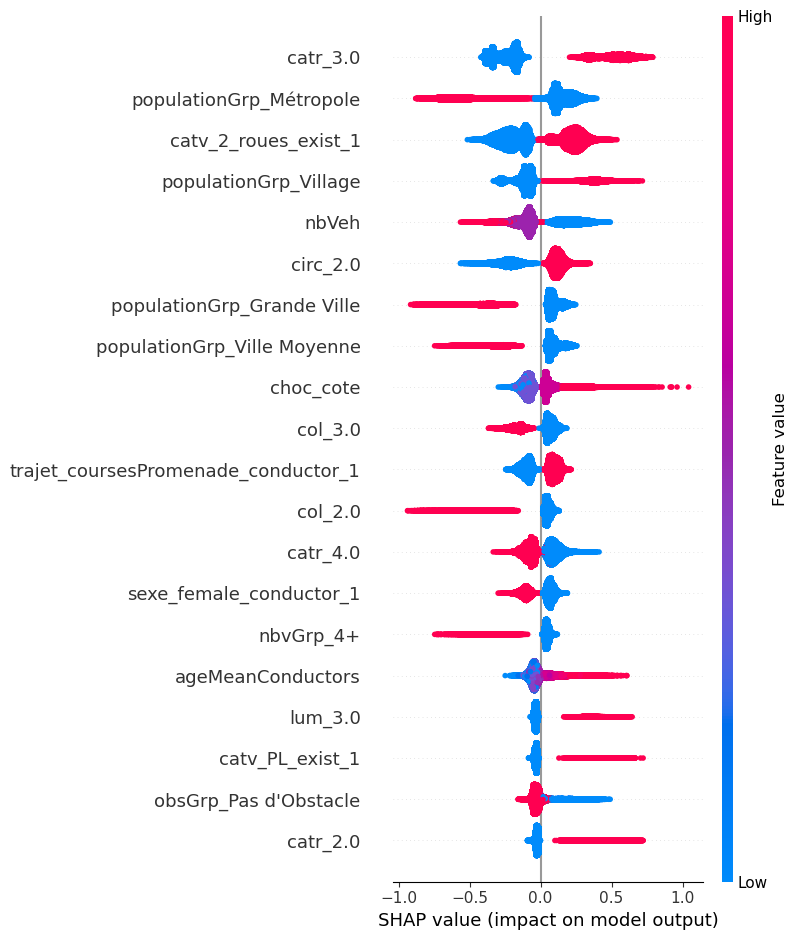

In [4]:
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

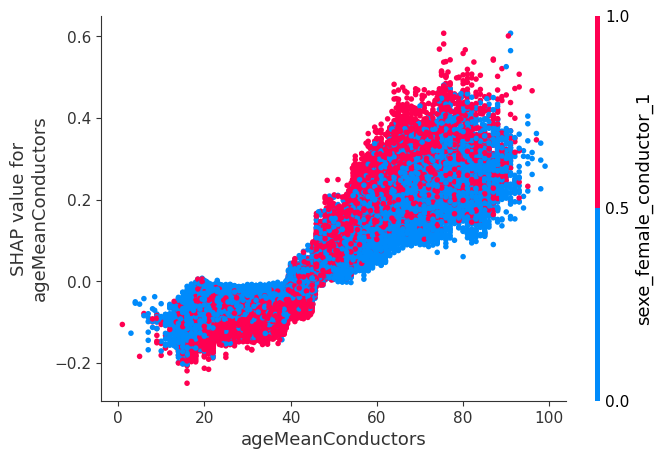

In [6]:
shap.dependence_plot("ageMeanConductors", shap_values[1], X_test, interaction_index= 'sexe_female_conductor_1')

In [9]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])